In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
fn = 'output/choose_para.txt'
result = pd.read_csv(fn, sep='\t')
result['nfactor'] = [round(x) for x in result['nfactor']]

In [5]:
## 2.1 Examine the cophenetic coefficient for different number of factors

plt.figure()
result.boxplot(by = 'K', column = 'coph', figsize=(8,5), fontsize = 10)
plt.xlabel("Number of factors assigned", size = 20)
plt.ylabel('Cophenetic coefficient', size = 20)
plt.title('')
#plt.show()
plt.savefig('output/choose_para_K.png')
plt.close()



plt.figure()
result.boxplot(by = 'nfactor', column = 'coph', figsize=(8,5), fontsize = 10)
plt.xlabel("Number of factors assigned", size = 20)
plt.ylabel('Cophenetic coefficient', size = 20)
plt.title('')
#plt.show()
plt.savefig('output/choose_para_nFactors.png')
plt.close()


## Narrow down the range of number of factors to have median cophenetic coefficient > 0.9

result = result[result['nfactor'] >= 9]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
## 2.2. Filter out implementations with low cophenetic coefficient
##      tried 0.95, 0.85, 0.8 - result in either the same or very similar optimal solution

res = result[result['coph'] >= 0.9]


In [5]:

## 2.3. Choose the implementation with the most independent factors
res = res.sort_values('correlation')
i = 0
K = str(int(res.iloc[i]['K']))
a1 = str(int(res.iloc[i]['alpha1']))
l1 = str(int(res.iloc[i]['lambda1']))
run_idx = str(int(res.iloc[i]['optimal_run']))


output/sn_spMF_K17_a1100_l150/sn_spMF_FactorMatrix_K17_a1100_l150_Run25.txt


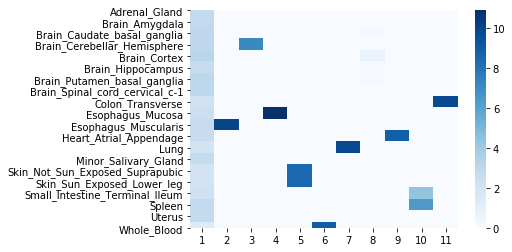

In [6]:

## Visualize the learned factor matrix
factor = 'K%s_a1%s_l1%s' % (K, a1, l1)
ffn = 'output/sn_spMF_%s/sn_spMF_FactorMatrix_%s_Run%s.txt' % (factor, factor, run_idx)
print(ffn)
fM = pd.read_csv(ffn, sep='\t')


sns.heatmap(fM, cmap = 'Blues')
plt.show()
plt.close()


